## Visualising data from mcdust

In this notebook we show a way to make use of the helper python scripts and the routines to analyse and visualise data from mcdust.

We import routines from the script mcdust.py which is in the `/scripts/` directory

In [1]:
from mcdust import Simulation, Plots

Let us also import some helper routines

In [2]:
import numpy as np
from astropy import constants as c
from astropy import units as u
from pathlib import Path

The routines to read and store data from mcdust are stored in the Simulation() class, so let's start by defining a variable

In [3]:
sim = Simulation()

Next, to make use of the read function we need to establish the location of the data and give the same as an input.

In [10]:
path='/scratch/vaikundaraman/mcdust/outputs/data/'
sim.read(path)

 Reading paramters file from data files in /scratch/vaikundaraman/mcdust/outputs/data/
mcdust   v1.0
Authors : Dr Joanna Drazkowska, Vignesh Vaikundaraman, Nerea Gurrutuxaga
Please cite Drążkowska, Windmark & Dullemond (2013) A&A 556, A37
Reading data ...


100%|███████████████████████████████████████████| 41/41 [00:06<00:00,  6.21it/s]
/scratch/vaikundaraman/mcdust/scripts/mcdust.py:86: RuntimeWarning: invalid value encountered in power
  mass_to_one_third = self.mass[:,:]**(1./3.)
/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:208: RuntimeWarning: divide by zero encountered in true_divide
  self.taugrowth = 1/self.dtg/self.omegaK[:]
/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:209: RuntimeWarning: divide by zero encountered in true_divide
  self.tmix = 1./(1e-3 * self.omegaK[:])
/scratch/vaikundaraman/mcdust/scripts/mcdisk.py:210: RuntimeWarning: invalid value encountered in true_divide
  self.rhog_mid  = self.sigmag/np.sqrt(2*np.pi)/self.Hg


Done!


We have read data into the object `sim`. The object `sim` contains the data of the swarms of the simulation in `sim.swarms` and the parameters of the simulation in `sim.pars`.

The object `sim.pars` contains the paramters of the simulation that was fed into `setup.par` to run the simulation. And along with those parameters, it also contains the number of swarms in the simulation `nswarms` and the number of outputs/snapshots of the simulation `ntime`.

The attributes of `sim.pars` can be seen below

In [11]:
sim.pars.__dict__

{'alpha_t': 0.001,
 'tgas': 280.0,
 'sigmagas': 800.0,
 'minr': 1.0,
 'maxr': 100.0,
 'a0': 1e-04,
 'vfrag': 1000.0,
 'rho_s': 1.2,
 'dtg': 0.01,
 'erosion_m_ratio': 10.0,
 't_end': 315581500000.0,
 'nr': 32,
 'nz': 16,
 'n_cell': 256,
 'nswarms': 131072,
 'ntime': 41,
 'eta': 0.05,
 'datadir': '/scratch/vaikundaraman/mcdust/outputs/data//',
 'alpha': 0.001}

The object`sim.swarms` contains the id number of the swarms, radial location[AU], vertical height[AU], Stokes Number, grain size[cm], internal density [g/cm^3], radial velocity [cm/s], vertical velocity [cm/s].

The properties are stored in 2 dimensional arrays with indices [ntime,nswarms]. Along with these properties it also contains the mass of a whole swarm `mswarm`(g) and the times (yr) of the snapshots of the simulation.

In [12]:
dir(sim.swarms)

['St',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_properties',
 'describe',
 'grain_size',
 'idnr',
 'indens',
 'mass',
 'mswarm',
 'rcents',
 'rdis',
 'read_hdf5',
 'rwalls',
 'sigmad',
 'snapt',
 'velr',
 'velz',
 'zdis']

An overall basic statistics for the given simulation can be seen at a glance with `sim.swarms.describe()`

In [13]:
sim.swarms.describe()

           mass [g]     Stokes Nr  grain_size [cm]
count  1.310430e+05  1.256890e+05    125689.000000
mean   4.649242e+01  3.429690e-03         0.301139
std    3.095323e+02  1.127975e-02         1.189444
min   -1.559608e-01  2.966955e-07         0.000100
25%    1.507964e-11  3.835972e-05         0.000159
50%    2.312212e-10  7.466801e-05         0.000385
75%    2.148849e-08  3.870658e-04         0.001904
max    8.513062e+03  1.354428e-01        11.919883


There is also a routine `sim.swarms.calculate_properties()` to calculate the dust surface density `sigma_d` for the simulation.

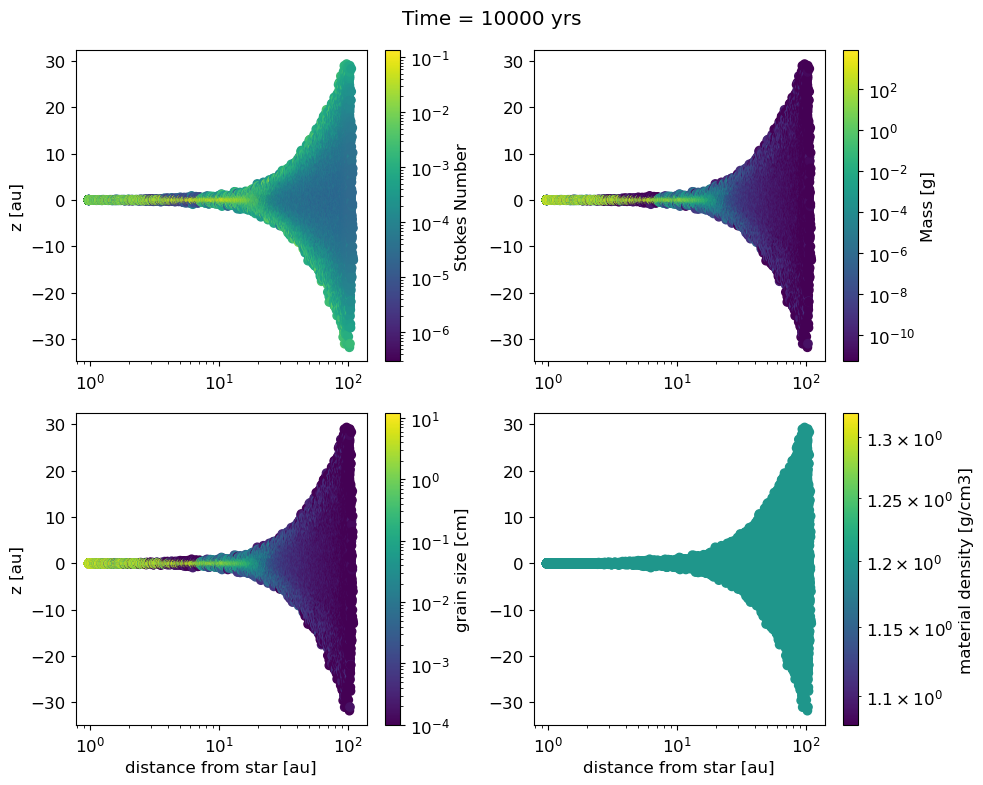

In [14]:
Plots.scatter_all(sim.swarms, step=1)

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

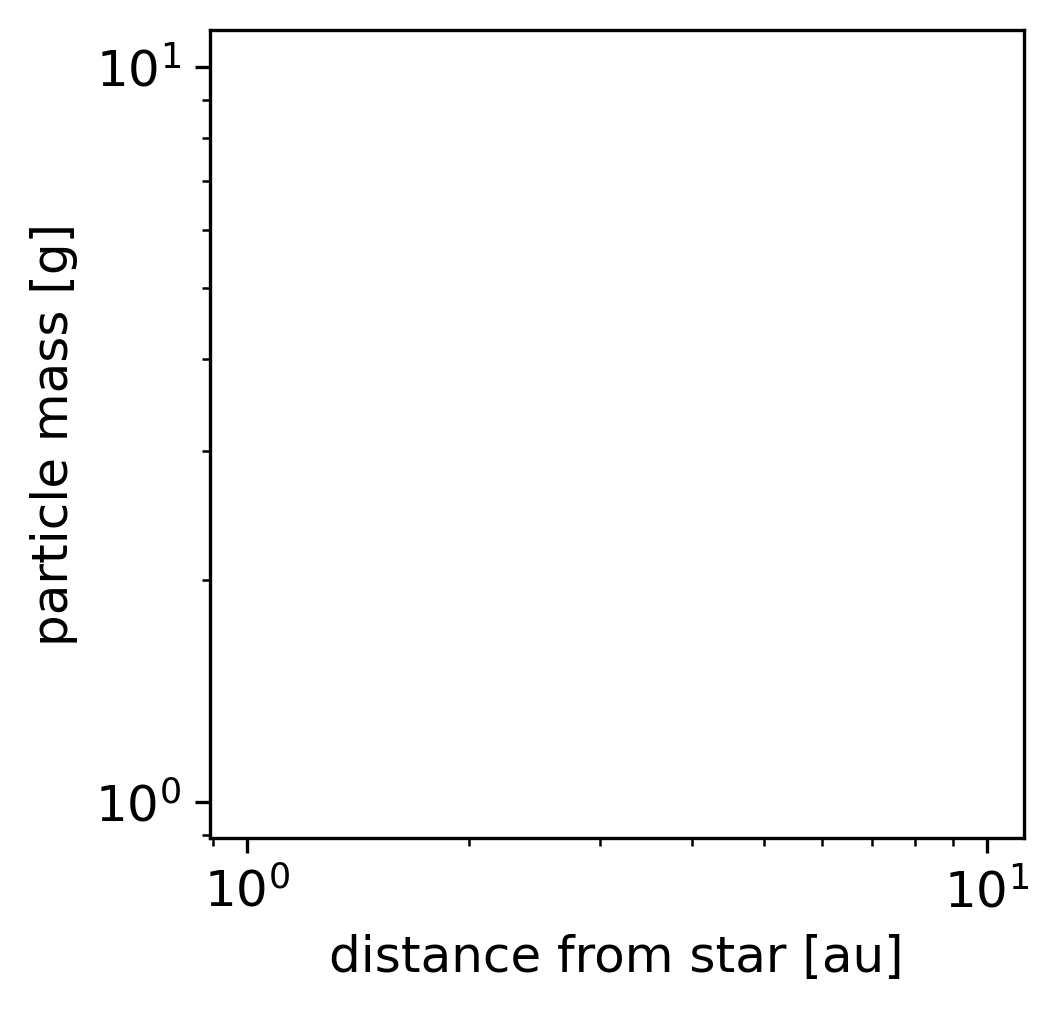

In [15]:
Plots.mass_dens_radial(sim.swarms,sim.pars)

In [18]:
np.size(np.where(np.isnan(sim.swarms.mass[-1,:])))

29